# Unit 5 - Financial Planning

In [1]:
%pip install alpaca_trade_api

Note: you may need to restart the kernel to use updated packages.


In [68]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [70]:
pwd

'C:\\Users\\herve\\Jupyterlab_Workspace\\UofM-VIRT-FIN-PT-11-2023-U-LOLC\\02-Homework\\05-APIs\\Instructions\\Starter_Code'

In [72]:
Path = 'C://Users//herve//Jupyterlab_Workspace//UofM-VIRT-FIN-PT-11-2023-U-LOLC/01-Sessions/05-APIs/2/Activities/03-Stu_Under_Lock_And_Key/Solved/My_Keys.env'

In [74]:
# Load .env enviroment variables
load_dotenv(Path)

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [78]:
# Set current amount of crypto assets
My_BTC = 1.2
My_ETH = 5.3

In [80]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [81]:
# Fetch current BTC price
data_btc = requests.get(btc_url).json()
data_eth = requests.get(eth_url).json()

# YOUR CODE HERE!
BTC_price = data_btc['data']['1']['quotes']['USD']['price']
print(f"Current price of BTC: ${BTC_price}")
# Fetch current ETH price
# YOUR CODE HERE!
ETH_price = data_eth['data']['1027']['quotes']['USD']['price']
print(f"Current price of ETH: ${ETH_price}")
# Compute current value of my crpto
current_value_BTC = BTC_price * My_BTC
current_value_ETH = ETH_price * My_ETH

# Print current crypto wallet balance
print(f"\nThe current value of your {My_BTC} BTC is ${current_value_BTC:0.2f}")
print(f"The current value of your {My_ETH} ETH is ${current_value_ETH:0.2f}")


Current price of BTC: $43106.0
Current price of ETH: $2381.39

The current value of your 1.2 BTC is $51727.20
The current value of your 5.3 ETH is $12621.37


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [84]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [85]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
Alpaca_Api_Key = os.getenv("ALPACA_API_KEY")
Alpaca_Secret_Key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    Alpaca_Api_Key,
    Alpaca_Secret_Key,
    api_version = 'v2'
)


In [86]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp('2021-01-27', tz = 'America/New_York').isoformat()
end_date = pd.Timestamp('2024-01-27', tz = 'America/New_York').isoformat()
# Set the tickers
tickers = ["AGG","SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [87]:


# Reorganize the DataFrame
portfolio_df = alpaca.get_bars(
    tickers, 
    timeframe, 
    start = start_date, 
    end = end_date, 
).df
SPY = portfolio_df[portfolio_df['symbol'] == 'SPY'].drop('symbol', axis = 1)
AGG = portfolio_df[portfolio_df['symbol'] == 'AGG'].drop('symbol', axis = 1)
portfolio_df.sort_index(ascending = False, axis = 0, inplace = True)


In [88]:
SPY

,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2021-01-27 05:00:00+00:00,374.65,380.320,372.0100,712260,380.220,126043890,376.527394
2021-01-28 05:00:00+00:00,377.52,381.930,375.8900,509967,376.360,96130471,378.400583
2021-01-29 05:00:00+00:00,370.14,376.670,368.2700,726128,375.630,129983765,372.153095
2021-02-01 05:00:00+00:00,376.02,377.340,370.3760,414902,373.720,77707586,374.532630
2021-02-02 05:00:00+00:00,381.25,383.220,376.3181,343864,379.650,66494770,381.479837
...,...,...,...,...,...,...,...
2024-01-22 05:00:00+00:00,483.45,485.220,482.7800,548090,484.010,76044931,483.678472
2024-01-23 05:00:00+00:00,484.86,485.105,482.8900,388977,484.010,49945297,484.054914
2024-01-24 05:00:00+00:00,485.39,488.770,484.8819,621290,487.810,81765039,486.643726


In [93]:
SPY_closing_price = portfolio_df['close'][0]
AGG_closing_price = portfolio_df['close'][1]

C:\Users\herve\AppData\Local\Temp\ipykernel_13352\446201901.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SPY_closing_price = portfolio_df['close'][0]
C:\Users\herve\AppData\Local\Temp\ipykernel_13352\446201901.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  AGG_closing_price = portfolio_df['close'][1]


In [94]:


# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

# Separate ticker data
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
# YOUR CODE HERE
portfolio_df = pd.concat([AGG,SPY], axis = 1, keys =['AGG','SPY'])
portfolio_df.sort_index(ascending = False, axis = 0, inplace = True)

# Preview DataFrame
# YOUR CODE HERE!
portfolio_df.head()

AGG                                      \
                           close     high     low trade_count   open   
timestamp                                                              
2024-01-26 05:00:00+00:00  98.07  98.2000  97.984       20246  98.20   
2024-01-25 05:00:00+00:00  98.18  98.2000  97.960       45226  98.01   
2024-01-24 05:00:00+00:00  97.74  98.3300  97.700       42228  98.29   
2024-01-23 05:00:00+00:00  97.96  98.0000  97.820       20546  97.99   
2024-01-22 05:00:00+00:00  98.20  98.3556  98.100       28012  98.26   

                                                   SPY                     \
                             volume       vwap   close     high       low   
timestamp                                                                   
2024-01-26 05:00:00+00:00   5022836  98.082765  487.41  489.120  486.5400   
2024-01-25 05:00:00+00:00  16521614  98.089172  488.03  488.305  485.3900   
2024-01-24 05:00:00+00:00  11278509  97.890250  485.39  488.770  484.8819   
2024-01-23 05:00:00+00:00   5642997  97.913458  484.86  485.105  482.8900   
2024-01-22 05:00:00+00:00   8712582  98.215700  483.45  485.220  482.7800   

                                                                      
                          trade_count     open    volume        vwap  
timestamp                                                             
2024-01-26 05:00:00+00:00      479616  487.590  76627335  487.689954  
2024-01-25 05:00:00+00:00      546403  487.575  72524989  486.942735  
2024-01-24 05:00:00+00:00      621290  487.810  81765039  486.643726  
2024-01-23 05:00:00+00:00      388977  484.010  49945297  484.054914  
2024-01-22 05:00:00+00:00      548090  484.010  76044931  483.678472

In [99]:
print(f"Current AGG closing price: ${AGG_closing_price}")
print(f"Current SPY closing price: ${SPY_closing_price}")

Current AGG closing price: $98.07
Current SPY closing price: $487.41


In [101]:
# Compute the current value of shares
# YOUR CODE HERE!
portfolio_Value_AGG = AGG_closing_price * my_agg
portfolio_Value_SPY = SPY_closing_price * my_spy
# Print current value of shares
#print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
#print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

In [103]:
print(f"The current value of your {my_spy} SPY shares is ${portfolio_Value_SPY:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${portfolio_Value_AGG:0.2f}")

The current value of your 50 SPY shares is $24370.50
The current value of your 200 AGG shares is $19614.00


### Savings Health Analysis

In [106]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
#total_value_crypto = portfolio + port_value_ETH
#total_value_stocks = port_value_AGG + port_value_SPY
total_value_crypto = current_value_BTC + current_value_ETH
total_value_stock = portfolio_Value_AGG + portfolio_Value_SPY
# Consolidate financial assets data
# YOUR CODE HERE!
df_savings = pd.DataFrame({'Real_amount': [total_value_crypto, total_value_stock]}, index = ['crypto', 'shares'])
# Create savings DataFrame
# YOUR CODE HERE!

# Display savings DataFrame
display(df_savings)

,Real_amount
crypto,64348.567
shares,43984.500


<Axes: title={'center': 'Savings'}, ylabel='Real_amount'>

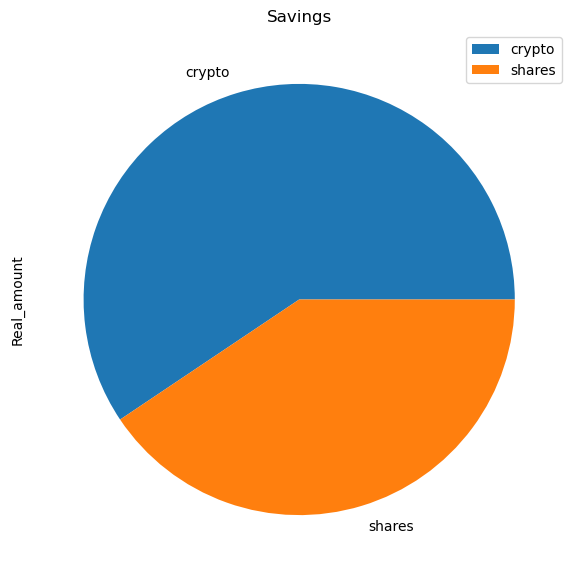

In [108]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(title = 'Savings', y = 'Real_amount', figsize = (7,7))

In [110]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = total_value_stock + total_value_crypto
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund: 
    print(f'Congrats! There is enough money in this fund --> ${total_savings:,.2f}')
elif total_savings == emergency_fund: 
    print('Congrats on reaching your Financial Goal!')
elif total_savings < emergency_fund: 
    account_deficit = emergency_fund - total_savings
    print(f'You are ${account_deficit:,.2f} away from your Financial Goal!')

Congrats! There is enough money in this fund --> $108,333.07


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [113]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [115]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
stock_df = alpaca.get_bars(
    tickers, 
    timeframe, 
    start = start_date, 
    end = end_date, 
).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
SPY = stock_df[stock_df['symbol'] == 'SPY'].drop('symbol', axis = 1)
AGG = stock_df[stock_df['symbol'] == 'AGG'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
stock_df = pd.concat([SPY, AGG], axis = 1, keys = ['SPY', 'AGG'])
# Display sample data
stock_df.head()

SPY                                      \
                              close    high     low trade_count    open   
timestamp                                                                 
2016-05-02 04:00:00+00:00  207.9700  208.18  206.41      263586  206.92   
2016-05-03 04:00:00+00:00  206.1592  206.80  205.28      377523  206.52   
2016-05-04 04:00:00+00:00  205.0100  205.85  204.42      345266  204.99   
2016-05-05 04:00:00+00:00  204.9700  205.98  204.47      280626  205.56   
2016-05-06 04:00:00+00:00  205.7200  205.77  203.88      340162  204.06   

                                                      AGG                      \
                              volume        vwap    close      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00   64747229  207.305695  110.605  110.7400  110.5200   
2016-05-03 04:00:00+00:00  108050343  206.309997  110.810  110.9450  110.7500   
2016-05-04 04:00:00+00:00   94995641  205.086315  110.860  110.9315  110.7595   
2016-05-05 04:00:00+00:00   68425268  205.140615  111.140  111.1600  110.8010   
2016-05-06 04:00:00+00:00   90999800  204.943796  110.970  111.1200  110.9700   

                                                                    
                          trade_count    open   volume        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00       15122  110.74  3608552  110.626939  
2016-05-03 04:00:00+00:00       15663  110.89  3128774  110.864495  
2016-05-04 04:00:00+00:00       13984  110.91  3096337  110.877983  
2016-05-05 04:00:00+00:00       15708  110.92  3052967  111.030002  
2016-05-06 04:00:00+00:00       12697  111.12  2922700  111.027631

In [117]:
 MC_stock_df = MCSimulation(
    portfolio_data = stock_df,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [119]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_stock_df.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 110.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 120.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 130.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 140.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 150.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 160.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 170.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 180.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 190.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 200.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 210.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 220.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 230.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 240.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 250.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 260.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 270.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 280.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 290.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 300.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 310.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 320.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 330.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 340.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 350.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 360.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 370.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 380.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 390.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 400.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 410.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 420.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 430.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 440.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 450.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 460.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 470.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 480.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 490.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991283,1.000493,1.006870,1.008194,0.994604,1.014070,1.003190,1.005462,1.006330,1.008804,...,0.993236,1.004358,1.000440,0.997216,1.008790,0.996337,0.999743,0.992149,1.005832,0.995349
2,0.988154,1.018856,1.003083,0.998636,0.995239,1.016268,0.999668,0.996490,1.001912,1.013501,...,0.994278,1.000570,0.998227,0.988028,1.006326,0.989099,0.985417,0.990979,1.007753,0.990268
3,0.993483,1.025555,1.001838,0.987803,0.994020,1.022022,1.003730,1.006636,1.015557,1.010581,...,0.995980,1.000170,1.002325,0.983154,1.000053,0.989581,1.001508,0.995647,1.005807,0.978483
4,0.990090,1.034479,1.010094,0.981877,0.984575,1.032588,1.010692,1.003962,1.018269,1.015350,...,0.998684,0.996284,1.012430,0.977283,1.003678,0.990338,0.996453,0.993276,0.991847,0.983348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,28.662720,12.192212,8.560761,14.215849,34.957041,26.411833,1.701651,33.333491,26.526182,15.821703,...,14.266347,20.554469,3.886952,40.611245,13.626576,23.529401,15.071095,74.573929,6.706288,31.356174
7557,28.756933,12.269236,8.534583,14.080828,34.570441,26.544803,1.697387,33.740210,26.678195,15.879311,...,14.308860,20.563374,3.864685,40.715758,13.826967,23.767845,14.990784,74.045753,6.737811,31.541605
7558,28.581903,12.212076,8.480342,14.102719,34.434034,26.458316,1.682798,33.494895,26.927036,15.975284,...,14.391579,20.661159,3.877881,40.966596,13.703852,23.509986,14.884117,73.544851,6.671575,31.651437
7559,28.444620,12.244063,8.529494,14.157610,33.943624,26.282592,1.711024,33.577180,26.947817,16.075588,...,14.478695,20.420895,3.925023,40.391006,13.856964,23.659656,15.005870,73.483688,6.688404,31.750066


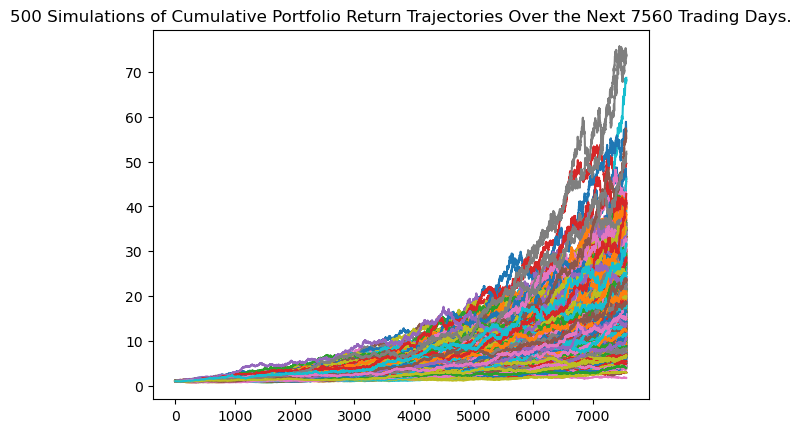

In [120]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_stock_df.plot_simulation().plot(figsize = (10,5))

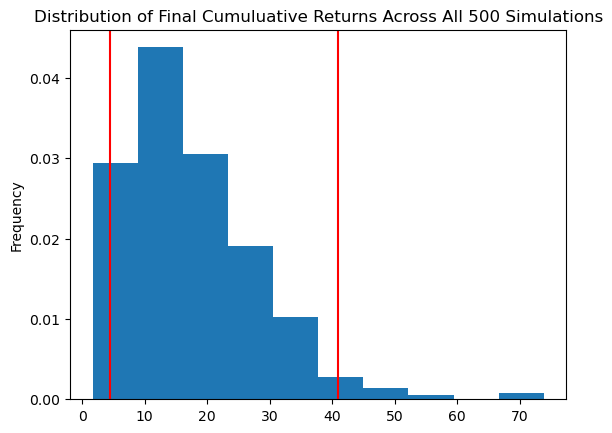

In [121]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
distribution_plot = MC_stock_df.plot_distribution()

### Retirement Analysis

In [126]:
variable_df = MC_stock_df.summarize_cumulative_return()
print(variable_df)

count           500.000000
mean             17.817950
std              10.575960
min               1.710042
25%               9.994602
50%              15.556828
75%              23.408525
max              73.870730
95% CI Lower      4.416710
95% CI Upper     40.997654
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [133]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(variable_df[8]*20000,2)
ci_upper = round(variable_df[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $88334.2 and $819953.08


C:\Users\herve\AppData\Local\Temp\ipykernel_13352\3932633260.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower = round(variable_df[8]*20000,2)
C:\Users\herve\AppData\Local\Temp\ipykernel_13352\3932633260.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper = round(variable_df[9]*20000,2)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [135]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(variable_df[8]*30000,2)
ci_upper = round(variable_df[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $132501.29 and $1229929.62


C:\Users\herve\AppData\Local\Temp\ipykernel_13352\400536345.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower = round(variable_df[8]*30000,2)
C:\Users\herve\AppData\Local\Temp\ipykernel_13352\400536345.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper = round(variable_df[9]*30000,2)


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [140]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyearreturn = MCSimulation(
    portfolio_data = stock_df,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [142]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyearreturn.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996569,0.996046,0.995647,1.000769,1.014476,0.993822,1.003786,1.008573,1.003688,1.004078,...,1.005081,1.000508,1.006792,0.994713,0.983665,1.001042,0.998871,0.992980,1.001393,0.998345
2,0.997709,0.984193,0.997195,0.999495,1.007039,0.998904,1.004799,1.023646,0.993473,1.013955,...,0.992009,0.999328,1.006829,0.993428,0.980272,1.005993,1.005419,0.997861,0.997968,0.994254
3,0.984666,0.978240,1.004686,0.997400,1.004145,0.994746,1.003564,1.025000,0.995805,1.021150,...,0.995506,0.999906,0.999125,1.001833,0.980939,1.007492,1.013789,1.001927,1.003797,0.989792
4,0.993594,0.976774,1.001365,1.008241,1.013093,0.999768,1.014023,1.028265,0.991899,1.025716,...,1.004331,0.994672,0.994244,1.000049,0.979866,1.019558,1.020883,0.997576,1.000077,1.001608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.626302,1.323029,0.844200,1.517758,1.669616,1.405774,1.364010,1.704106,1.521346,1.848216,...,1.088826,2.640871,1.238440,1.757330,1.401377,2.355967,1.895644,1.152772,1.262858,2.995321
1257,1.606598,1.320805,0.840363,1.521493,1.659311,1.417750,1.380912,1.694469,1.540810,1.855237,...,1.086315,2.632111,1.236368,1.765076,1.412754,2.355561,1.880423,1.161329,1.252256,2.973047
1258,1.594291,1.313561,0.840372,1.502985,1.682903,1.422306,1.386764,1.693462,1.553248,1.862570,...,1.090825,2.664610,1.233973,1.767322,1.431614,2.356142,1.876011,1.168492,1.251245,2.973362
1259,1.606987,1.319722,0.845174,1.506329,1.687001,1.425901,1.400860,1.685452,1.554793,1.875372,...,1.089812,2.683294,1.242535,1.784072,1.446026,2.331660,1.888990,1.165485,1.280344,2.968999


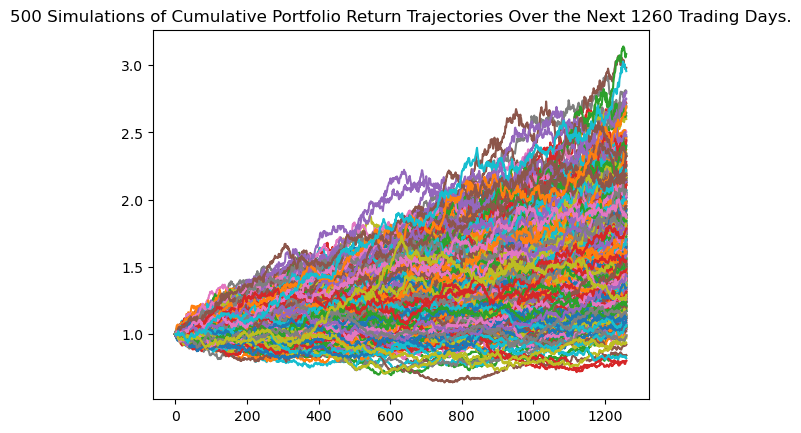

In [144]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_fiveyearreturn.plot_simulation()

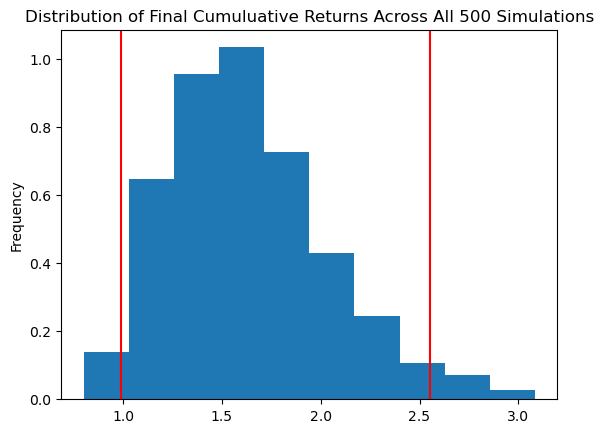

In [146]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_fiveyearreturn.plot_distribution()

In [148]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC_fiveyear_df = MC_fiveyearreturn.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
MC_fiveyear_df

count           500.000000
mean              1.632363
std               0.402548
min               0.801245
25%               1.346510
50%               1.601712
75%               1.861934
max               3.083657
95% CI Lower      0.990438
95% CI Upper      2.554687
Name: 1260, dtype: float64

In [152]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 36000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
MC5_lower = round(MC_fiveyear_df[8] * initial_investment, 2)
MC5_upper = round(MC_fiveyear_df[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${MC5_lower} and ${MC5_upper}")

There is a 95% chance that an initial investment of $36000 in the portfolio over the next 5 years will end within in the range of $35655.76 and $91968.72


C:\Users\herve\AppData\Local\Temp\ipykernel_13352\796433847.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  MC5_lower = round(MC_fiveyear_df[8] * initial_investment, 2)
C:\Users\herve\AppData\Local\Temp\ipykernel_13352\796433847.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  MC5_upper = round(MC_fiveyear_df[9] * initial_investment, 2)


### Ten Years Retirement Option

In [157]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyearreturn = MCSimulation(
    portfolio_data = stock_df,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [159]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyearreturn.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 110.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 120.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 130.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 140.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 150.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 160.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 170.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 180.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 190.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 200.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 210.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 220.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 230.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 240.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 250.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 260.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 270.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 280.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 290.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 300.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 310.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 320.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 330.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 340.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 350.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 360.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 370.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 380.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 390.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 400.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 410.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 420.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 430.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 440.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 450.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 460.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 470.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 480.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

Running Monte Carlo simulation number 490.


C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Workspace\UofM-VIRT-FIN-PT-11-2023-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\herve\Jupyterlab_Worksp

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008473,1.005864,0.988591,0.988227,1.001487,1.001422,0.999946,0.998297,1.007299,0.992944,...,1.004645,0.998312,1.009931,0.995640,1.003954,1.001353,1.007600,1.004144,1.009929,0.999510
2,1.011217,1.002995,0.989782,0.989309,1.006366,0.999434,1.001760,1.005948,1.004145,1.000827,...,1.010525,0.986725,1.011028,0.998043,0.994754,1.007451,1.002310,1.005831,0.997573,0.971827
3,0.998476,1.013511,0.983620,0.991832,1.013540,1.001761,1.003948,1.010802,1.000084,1.000267,...,1.017325,0.988292,1.005326,1.004369,1.004652,1.005548,1.002472,1.008971,1.002050,0.972474
4,0.992642,1.001636,0.980737,0.994859,1.016525,1.006892,0.988488,1.012369,1.011163,1.004221,...,1.011961,0.990876,1.017169,1.016103,0.999067,1.005229,1.007731,1.014157,0.990960,0.965138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.176153,2.200078,3.066732,1.986227,3.800753,3.026362,3.406884,4.483375,3.605170,2.132455,...,2.067353,2.429960,1.660645,1.558270,2.469981,2.508410,1.402625,3.581854,2.701619,3.166242
2517,4.161013,2.199964,3.069471,1.969069,3.804048,3.079314,3.403605,4.495035,3.601245,2.145948,...,2.044375,2.394081,1.664869,1.567149,2.429519,2.506699,1.420648,3.547871,2.702422,3.168066
2518,4.184352,2.173268,3.089401,1.967278,3.798325,3.054223,3.397092,4.513419,3.587691,2.130148,...,2.048506,2.380965,1.654925,1.576953,2.415209,2.509387,1.414431,3.587723,2.725748,3.134949
2519,4.164429,2.182609,3.073272,1.947060,3.834854,3.060284,3.366123,4.546672,3.567906,2.141204,...,2.067386,2.369921,1.639323,1.587647,2.395146,2.527494,1.429646,3.594639,2.752107,3.101629


[]

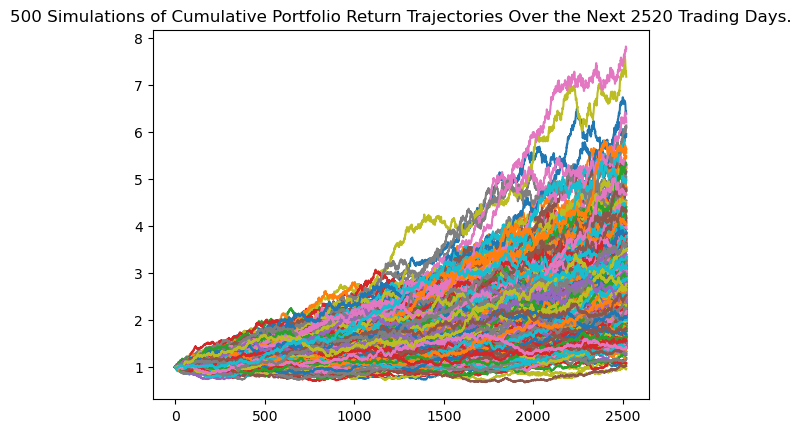

In [161]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_tenyearreturn.plot_simulation().plot(figsize = (10,7))

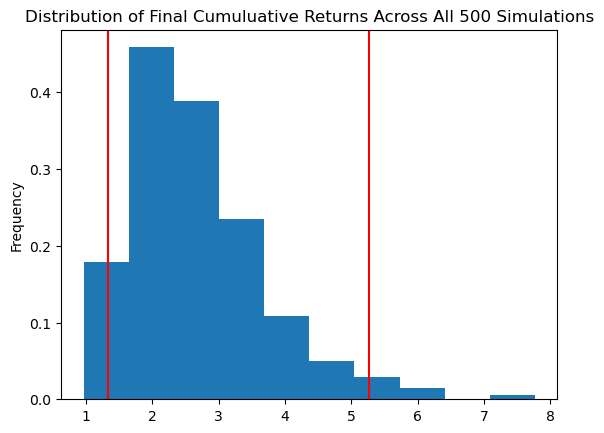

In [163]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_tenyearreturn.plot_distribution()

In [165]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC_tenyear_df = MC_tenyearreturn.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(MC_tenyear_df)

count           500.000000
mean              2.690033
std               1.019030
min               0.966157
25%               2.009829
50%               2.449549
75%               3.181264
max               7.768635
95% CI Lower      1.324852
95% CI Upper      5.272739
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
MC10_lower = round(MC_tenyear_df[8] * initial_investment, 2)
MC10_upper = round(MC_tenyear_df[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${MC10_lower} and ${MC10_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
